In [102]:
import src.animation as animation
import matplotlib.pyplot as plt 
import numpy as np 
import src.fd as fd 

def getC2Gradient(f, dx):
    f_dx = 1/12*np.roll(f, 2*fd.ROLL_L) - 2/3*np.roll(f, fd.ROLL_L) + 2 / \
        3*np.roll(f, fd.ROLL_R) - 1/12*np.roll(f, 2*fd.ROLL_R)
    return f_dx/dx

def getv(phase, dx):
    return getC2Gradient(phase, dx)

plt.rcParams["font.family"] = "FreeSerif"
plt.rcParams["font.size"] = 8

0.10000000000000081


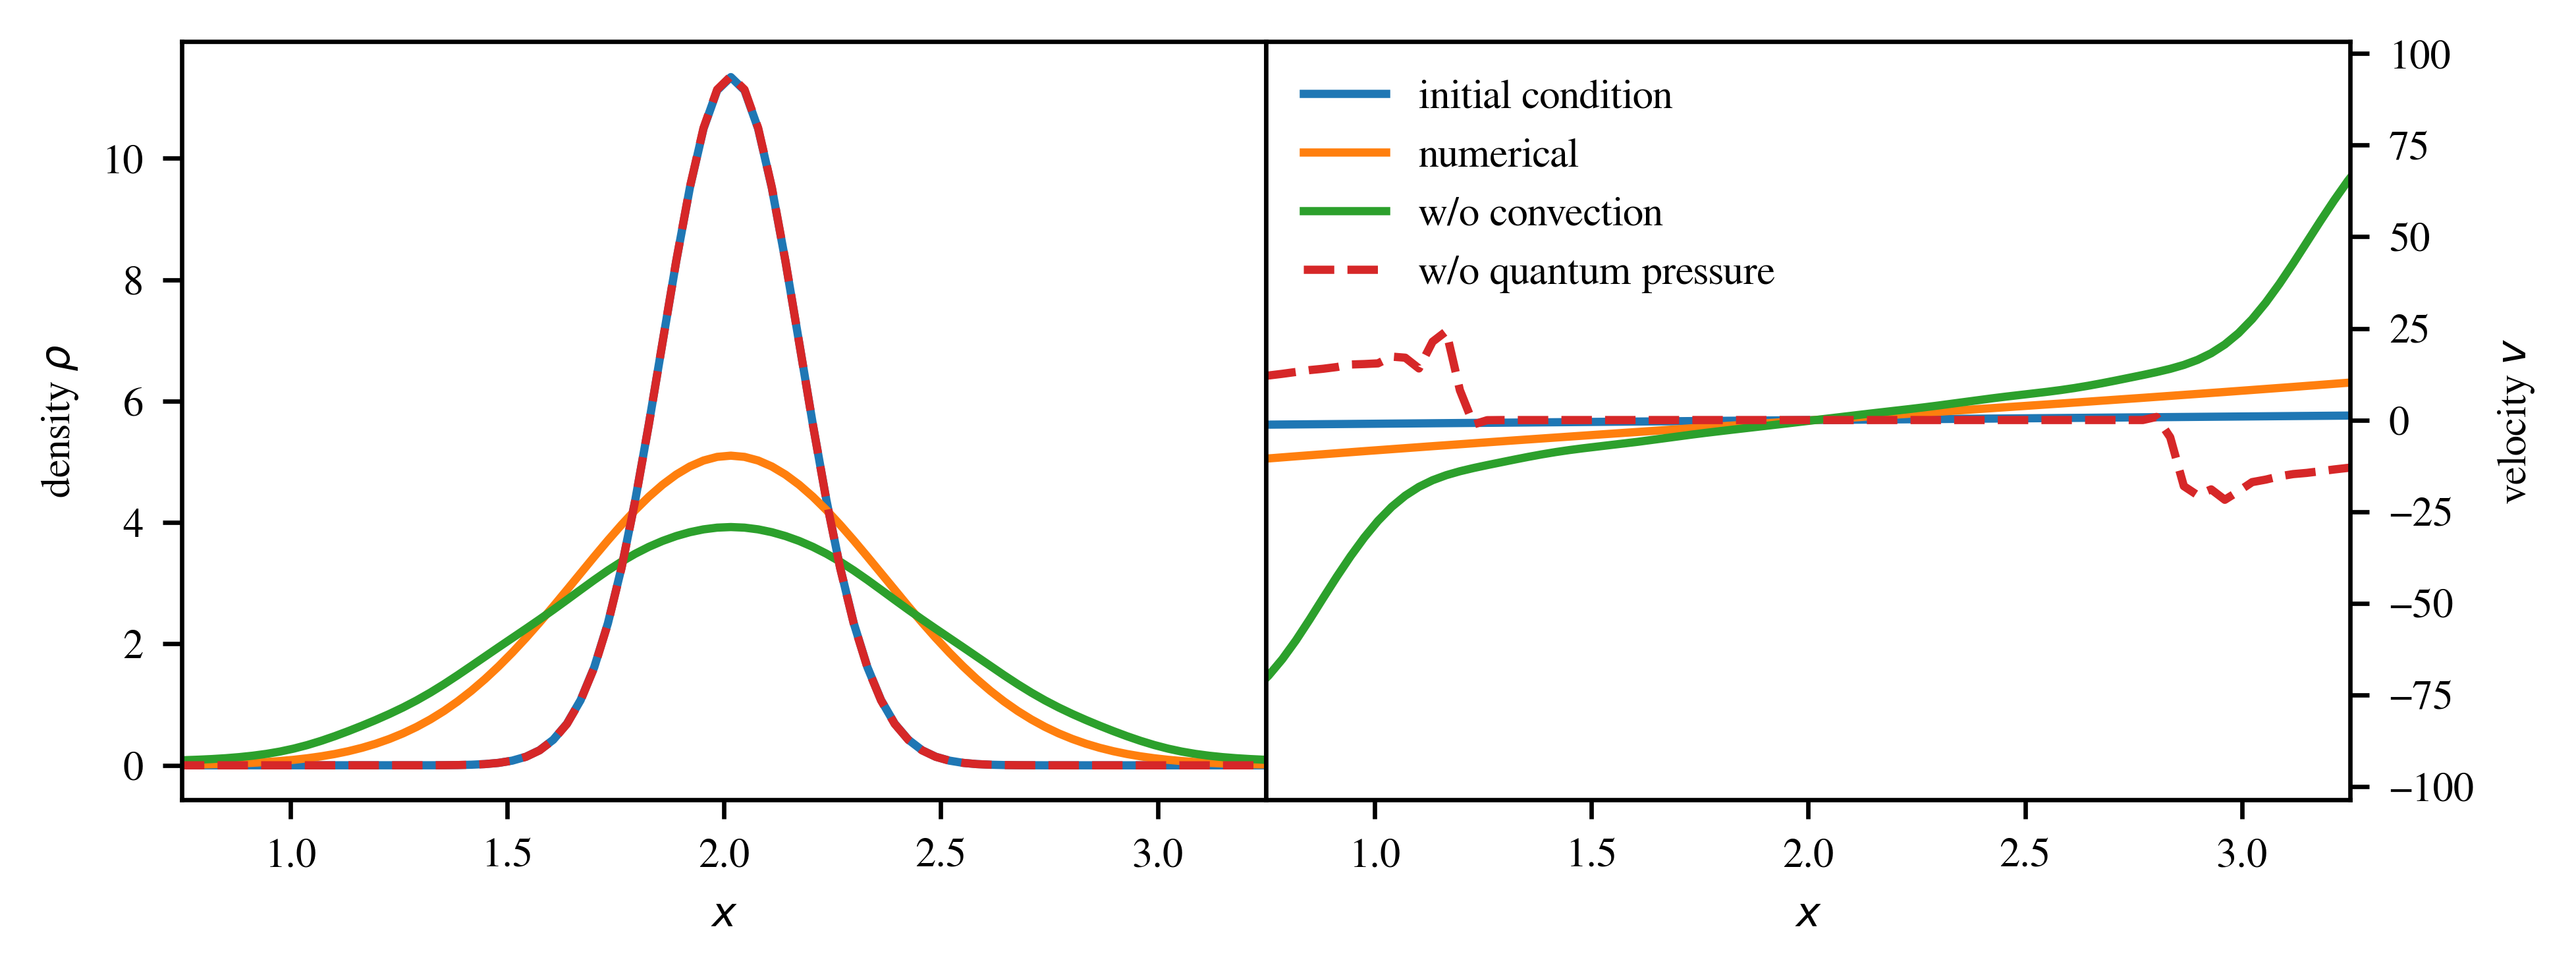

In [8]:
import matplotlib 

idx = 39
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/gaussian_wave_packet_ho-upwind__{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/gaussian_wave_packet_ho-upwind__{idx}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind_without_convection/gaussian_wave_packet_ho-upwind__without_convection_{idx}.npz")
config3, psi3 , density3, phase3= animation.loadRun(
    f"runs/1d/gaussian_wave_packet_ho-upwind_without_quantum_pressure/gaussian_wave_packet_ho-upwind__without_quantum_pressure_{idx}.npz"
    )
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
t = config1["t0"]

print(t)
fig, ax = plt.subplots(1, 2, figsize=(3.54 * 2, 2.54), dpi = 600)
plt.subplots_adjust(wspace=0.) 
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.sca(ax[0])
plt.xticks()
plt.yticks()
plt.xlim(0.75, 3.25)
plt.plot(xx, density0[8:-8])
plt.plot(xx, density1[8:-8])
plt.plot(xx, density2[8:-8])
plt.plot(xx, density3[8:-8], ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"density $\rho$")
plt.sca(ax[1])
plt.xticks()
plt.yticks()
plt.xlim(0.75, 3.25)
plt.plot(xx, getv(phase0, dx)[8:-8], label = "initial condition")
plt.plot(xx, getv(phase1, dx)[8:-8], label = "numerical")
plt.plot(xx, getv(phase2, dx)[8:-8], label = "w/o convection")
plt.plot(xx, getv(phase3, dx)[8:-8], label = "w/o quantum pressure", ls = "dashed")
plt.xlabel("$x$")
plt.ylabel("velocity $v$")
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/standing_gaussian.pdf", bbox_inches='tight')

0.0025249999999999834 0.005 1


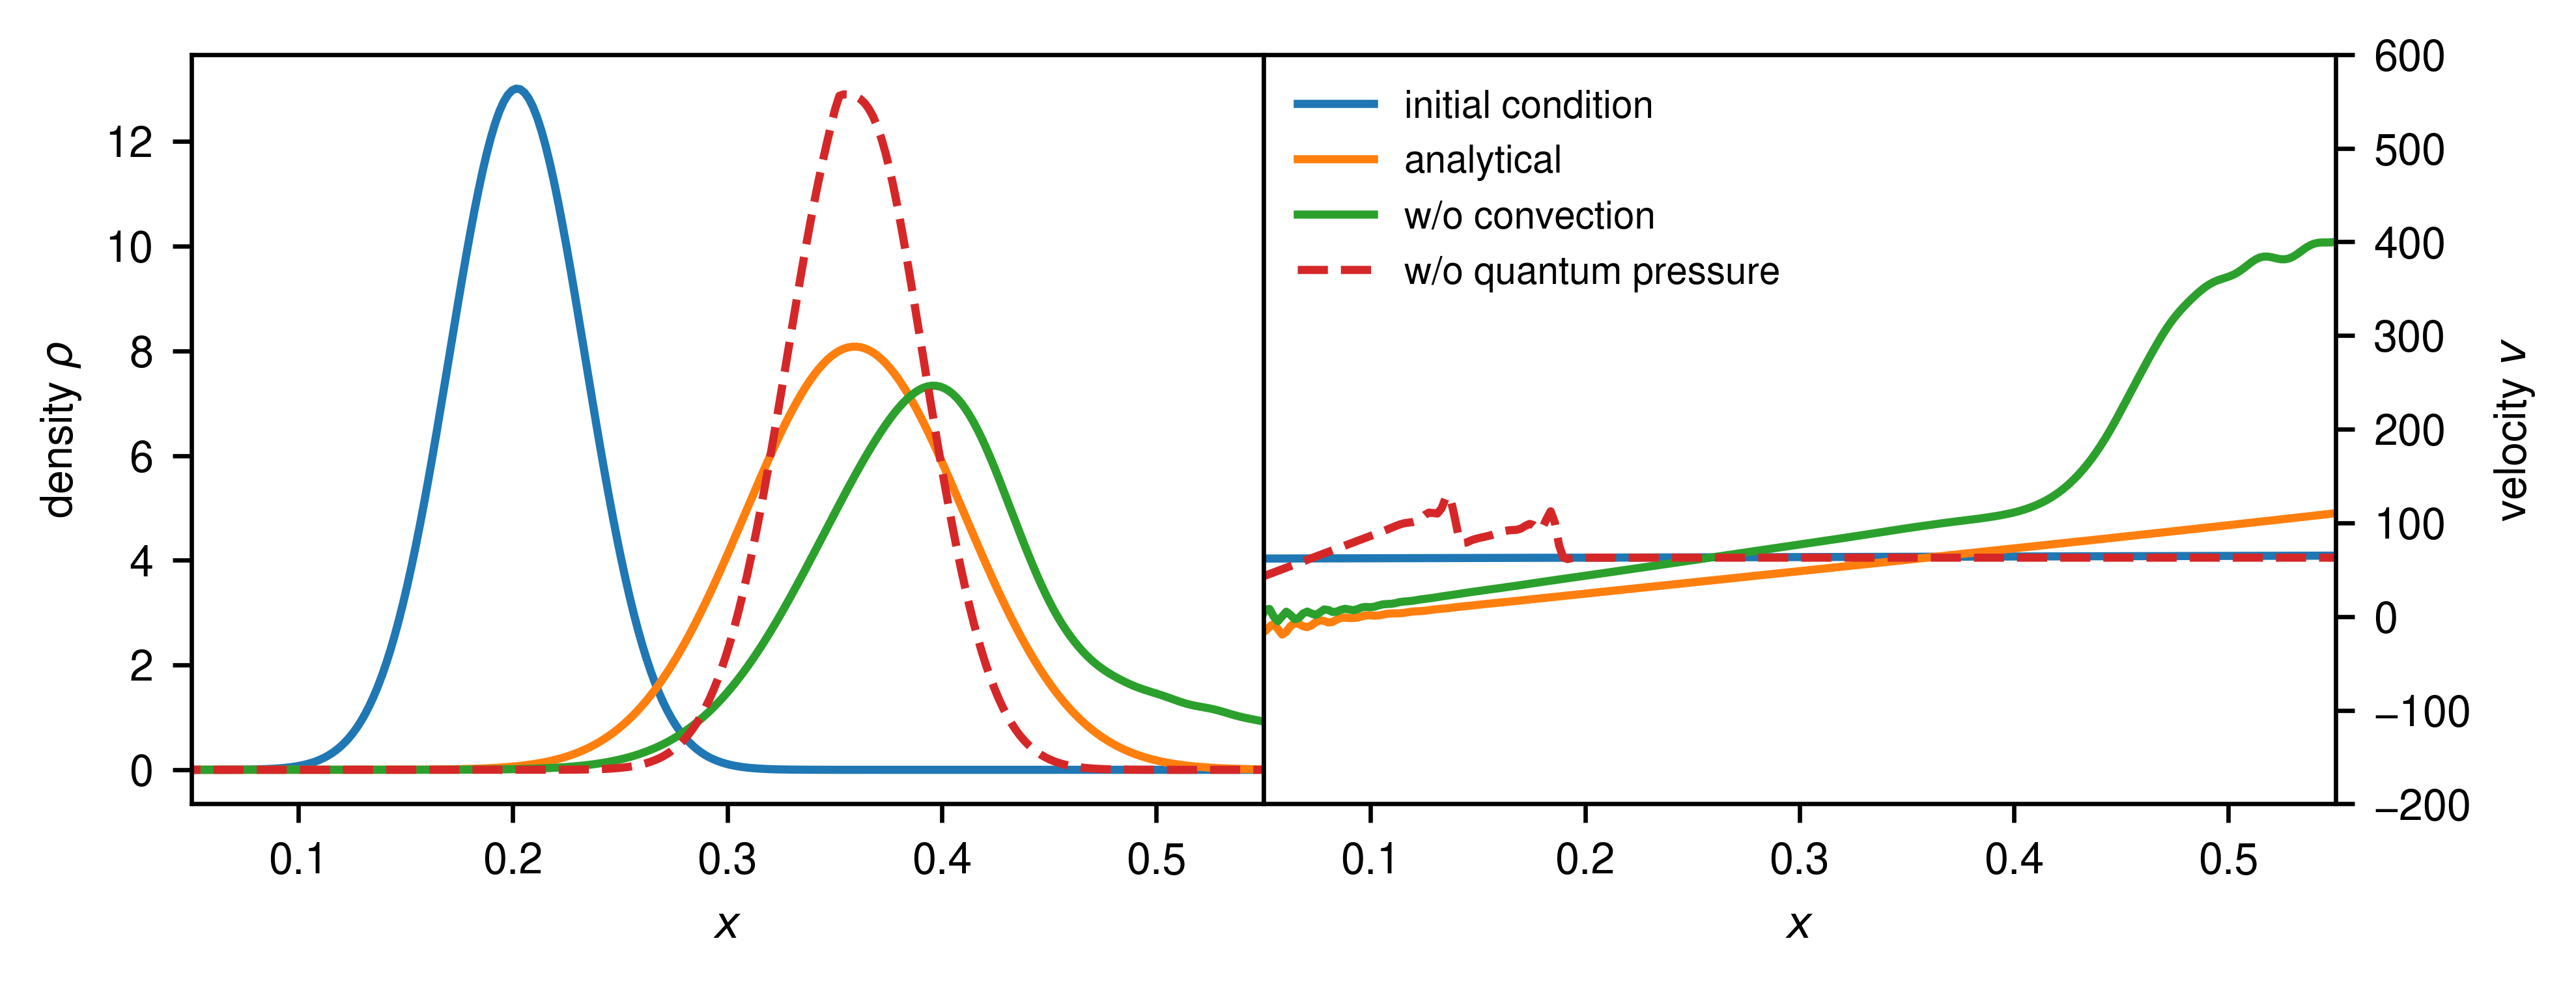

In [12]:
idx = 100
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/travelling_wave_packet_ho-upwind/{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/travelling_wave_packet_ho-upwind/{idx}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/travelling_wave_packet_ho-upwind_without_convection/{idx}.npz")
config3, psi3 , density3, phase3= animation.loadRun(
    f"runs/1d/travelling_wave_packet_ho-upwind_without_diffusion/{idx}.npz"
    )
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
print(config1["t0"], config1["tEnd"], config1["domainSize"])

fig, ax = plt.subplots(1, 2, figsize=(3.54 * 2, 2.54), dpi = 600)
plt.subplots_adjust(wspace=0.) 
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.sca(ax[0])
plt.xlim(0.05, .55)
plt.plot(xx, density0[8:-8])
plt.plot(xx, density1[8:-8])
plt.plot(xx, density2[8:-8])
plt.plot(xx, density3[8:-8], ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"density $\rho$")
plt.sca(ax[1])
plt.xlim(0.05, .55)
plt.ylim(-200, 600)
plt.plot(xx, getv(phase0, dx)[8:-8], label = "initial condition")
plt.plot(xx, getv(phase1, dx)[8:-8], label = "analytical")
plt.plot(xx, getv(phase2, dx)[8:-8], label = "w/o convection")
plt.plot(xx, getv(phase3, dx)[8:-8], label = "w/o quantum pressure", ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"velocity $v$")
leg = plt.legend(loc="upper left",fontsize = 7)
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/travelling_gaussian.pdf", bbox_inches='tight')

1.2549999999999952 20 10


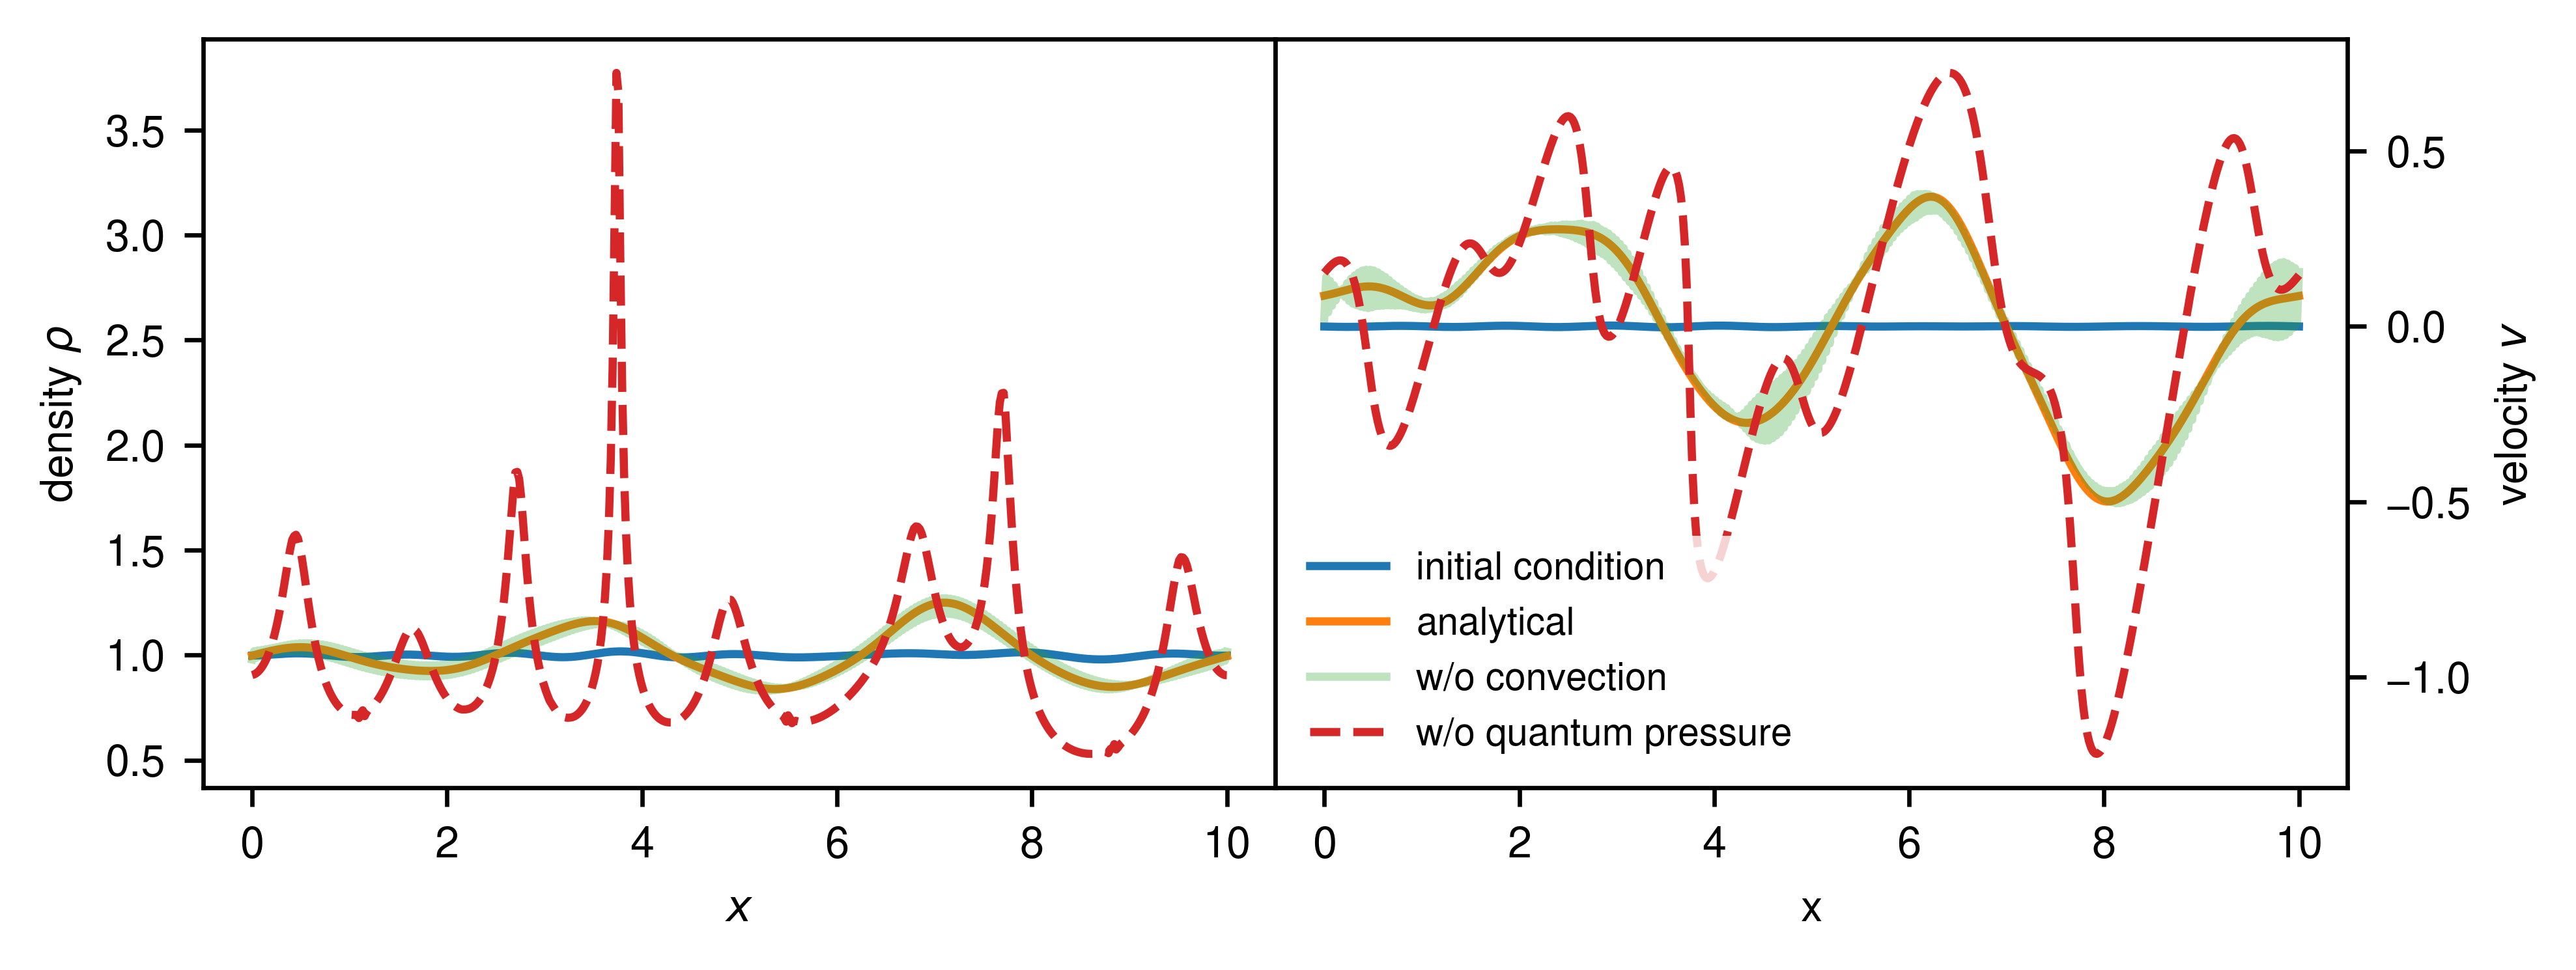

In [10]:
idx = 250
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/soliton_spectral_(fft)/{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/soliton_spectral_(fft)/{idx}.npz")
config4, psi4 , density4, phase4= animation.loadRun(f"runs/1d/soliton_spectral_(fft)/{1000}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/soliton_ho-upwind_without_convection/{idx}.npz")
config3, psi3 , density3, phase3= animation.loadRun(f"runs/1d/soliton_ho-upwind_without_diffusion/{idx}.npz")
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
print(config1["t0"], config1["tEnd"], config1["domainSize"])

fig, ax = plt.subplots(1, 2, figsize=(3.54 * 2, 2.54), dpi = 600)
plt.subplots_adjust(wspace=0.) 
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.sca(ax[0])
#plt.xlim(0.05, .55)
plt.plot(xx, density0)
plt.plot(xx, density1)
#plt.plot(xx, density)
plt.plot(xx, density2, alpha = 0.3)
plt.plot(xx, density3, ls = "dashed")
plt.xlabel("$x$")
plt.ylabel(r"density $\rho$")
plt.sca(ax[1])
#plt.xlim(0.05, .55)
#plt.ylim(-200, 600)
plt.plot(xx, getv(phase0, dx), label = "initial condition")
plt.plot(xx, getv(phase1, dx), label = "analytical")
plt.plot(xx, getv(phase2, dx), label = "w/o convection", alpha =0.3)
plt.plot(xx, getv(phase3, dx), label = "w/o quantum pressure", ls = "dashed")
plt.xlabel("x")
plt.ylabel(r"velocity $v$")
leg = plt.legend(fontsize = 7)
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/soliton.pdf", bbox_inches='tight')


In [109]:
def setUpPlot(nrow = 1, xlim = None, xticks = None, densityTicks = None, phaseTicks = None):
    fig, ax = plt.subplots(nrow, 2, figsize=(3.54 * 2, nrow * 2.54), dpi = 600, sharex=True)
    plt.subplots_adjust(wspace=0., hspace=0.) 
    if nrow == 1:
        ax = ax.reshape((nrow, 2))
    for i in range(nrow):
        plt.sca(ax[i, 0])
        plt.xticks()
        plt.yticks()
        plt.ylabel(r"density $\rho$")
        plt.xlabel("$x$")
        if xticks is not None:
            plt.xticks(xticks)
            plt.yticks(densityTicks)
        if xlim is not None:
            plt.xlim(xlim)

        plt.sca(ax[i, 1])
        plt.xticks()
        plt.yticks()
        plt.ylabel("phase $S$")
        plt.xlabel("$x$")
        if xticks is not None:
            plt.xticks(xticks)
            plt.yticks(phaseTicks)
        if xlim is not None:
            plt.xlim(xlim)

        ax[i, 1].yaxis.tick_right()
        ax[i, 1].yaxis.set_label_position("right")
    return fig, ax

## Gaussian wave packet

0.052499999999999894 0.25 4


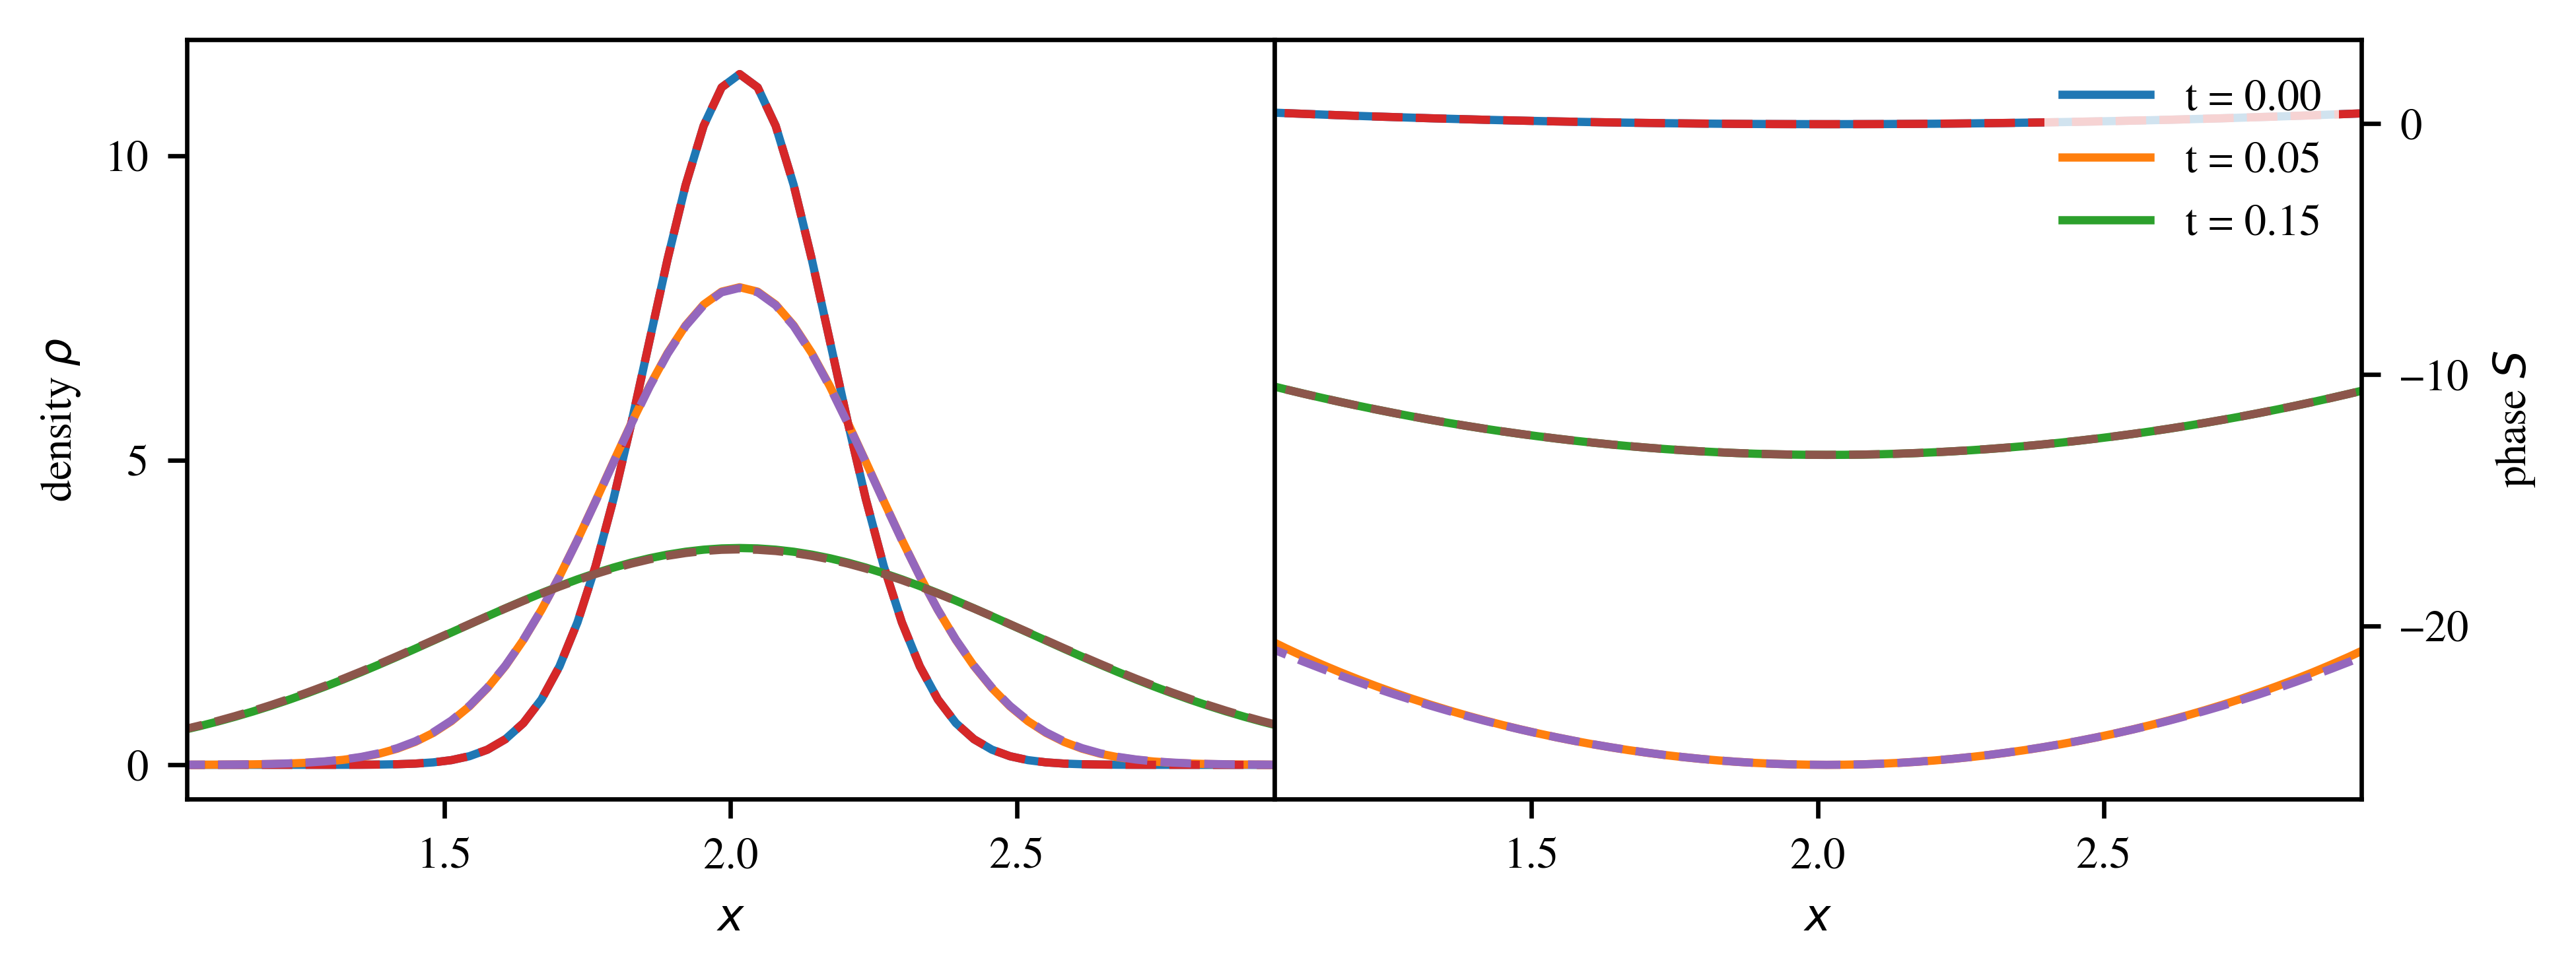

In [110]:
idx = 250
config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/{20}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/gaussian_wave_packet_ho-upwind/{60}.npz")
t1 = config0["t0"]
t2 = config1["t0"]
t3 = config2["t0"]
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
print(config1["t0"], config1["tEnd"], config1["domainSize"])

fig, ax = setUpPlot(xlim = [1.05, 2.95], xticks=[1.5, 2, 2.5], densityTicks=[0, 5, 10], phaseTicks=[0, -10, -20])

plt.sca(ax[0, 0])
#plt.xlim(0.05, .55)
plt.plot(xx, density0[8:-8])
plt.plot(xx, density1[8:-8])
plt.plot(xx, density2[8:-8])
plt.plot(xx, (np.abs(psi0)**2)[8:-8], ls = "dashed")
plt.plot(xx, (np.abs(psi1)**2)[8:-8], ls = "dashed")
plt.plot(xx, (np.abs(psi2)**2)[8:-8], ls = "dashed")
plt.sca(ax[0, 1])
plt.plot(xx, phase0[8:-8], label=f"t = {t1:.2f}")
plt.plot(xx, phase1[8:-8], label=f"t = {t2:.2f}")
plt.plot(xx, phase2[8:-8], label=f"t = {t3:.2f}")
plt.plot(xx, fd.make_continuous(np.angle(psi0))[8:-8], ls = "dashed")
plt.plot(xx, fd.make_continuous(np.angle(psi1))[8:-8], ls = "dashed")
plt.plot(xx, fd.make_continuous(np.angle(psi2))[8:-8], ls = "dashed")
leg = plt.legend(loc="upper right")
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/gaussian_wave_packet.pdf", bbox_inches='tight')

## Quasi-shock

0.005100000000000035 0.01 20


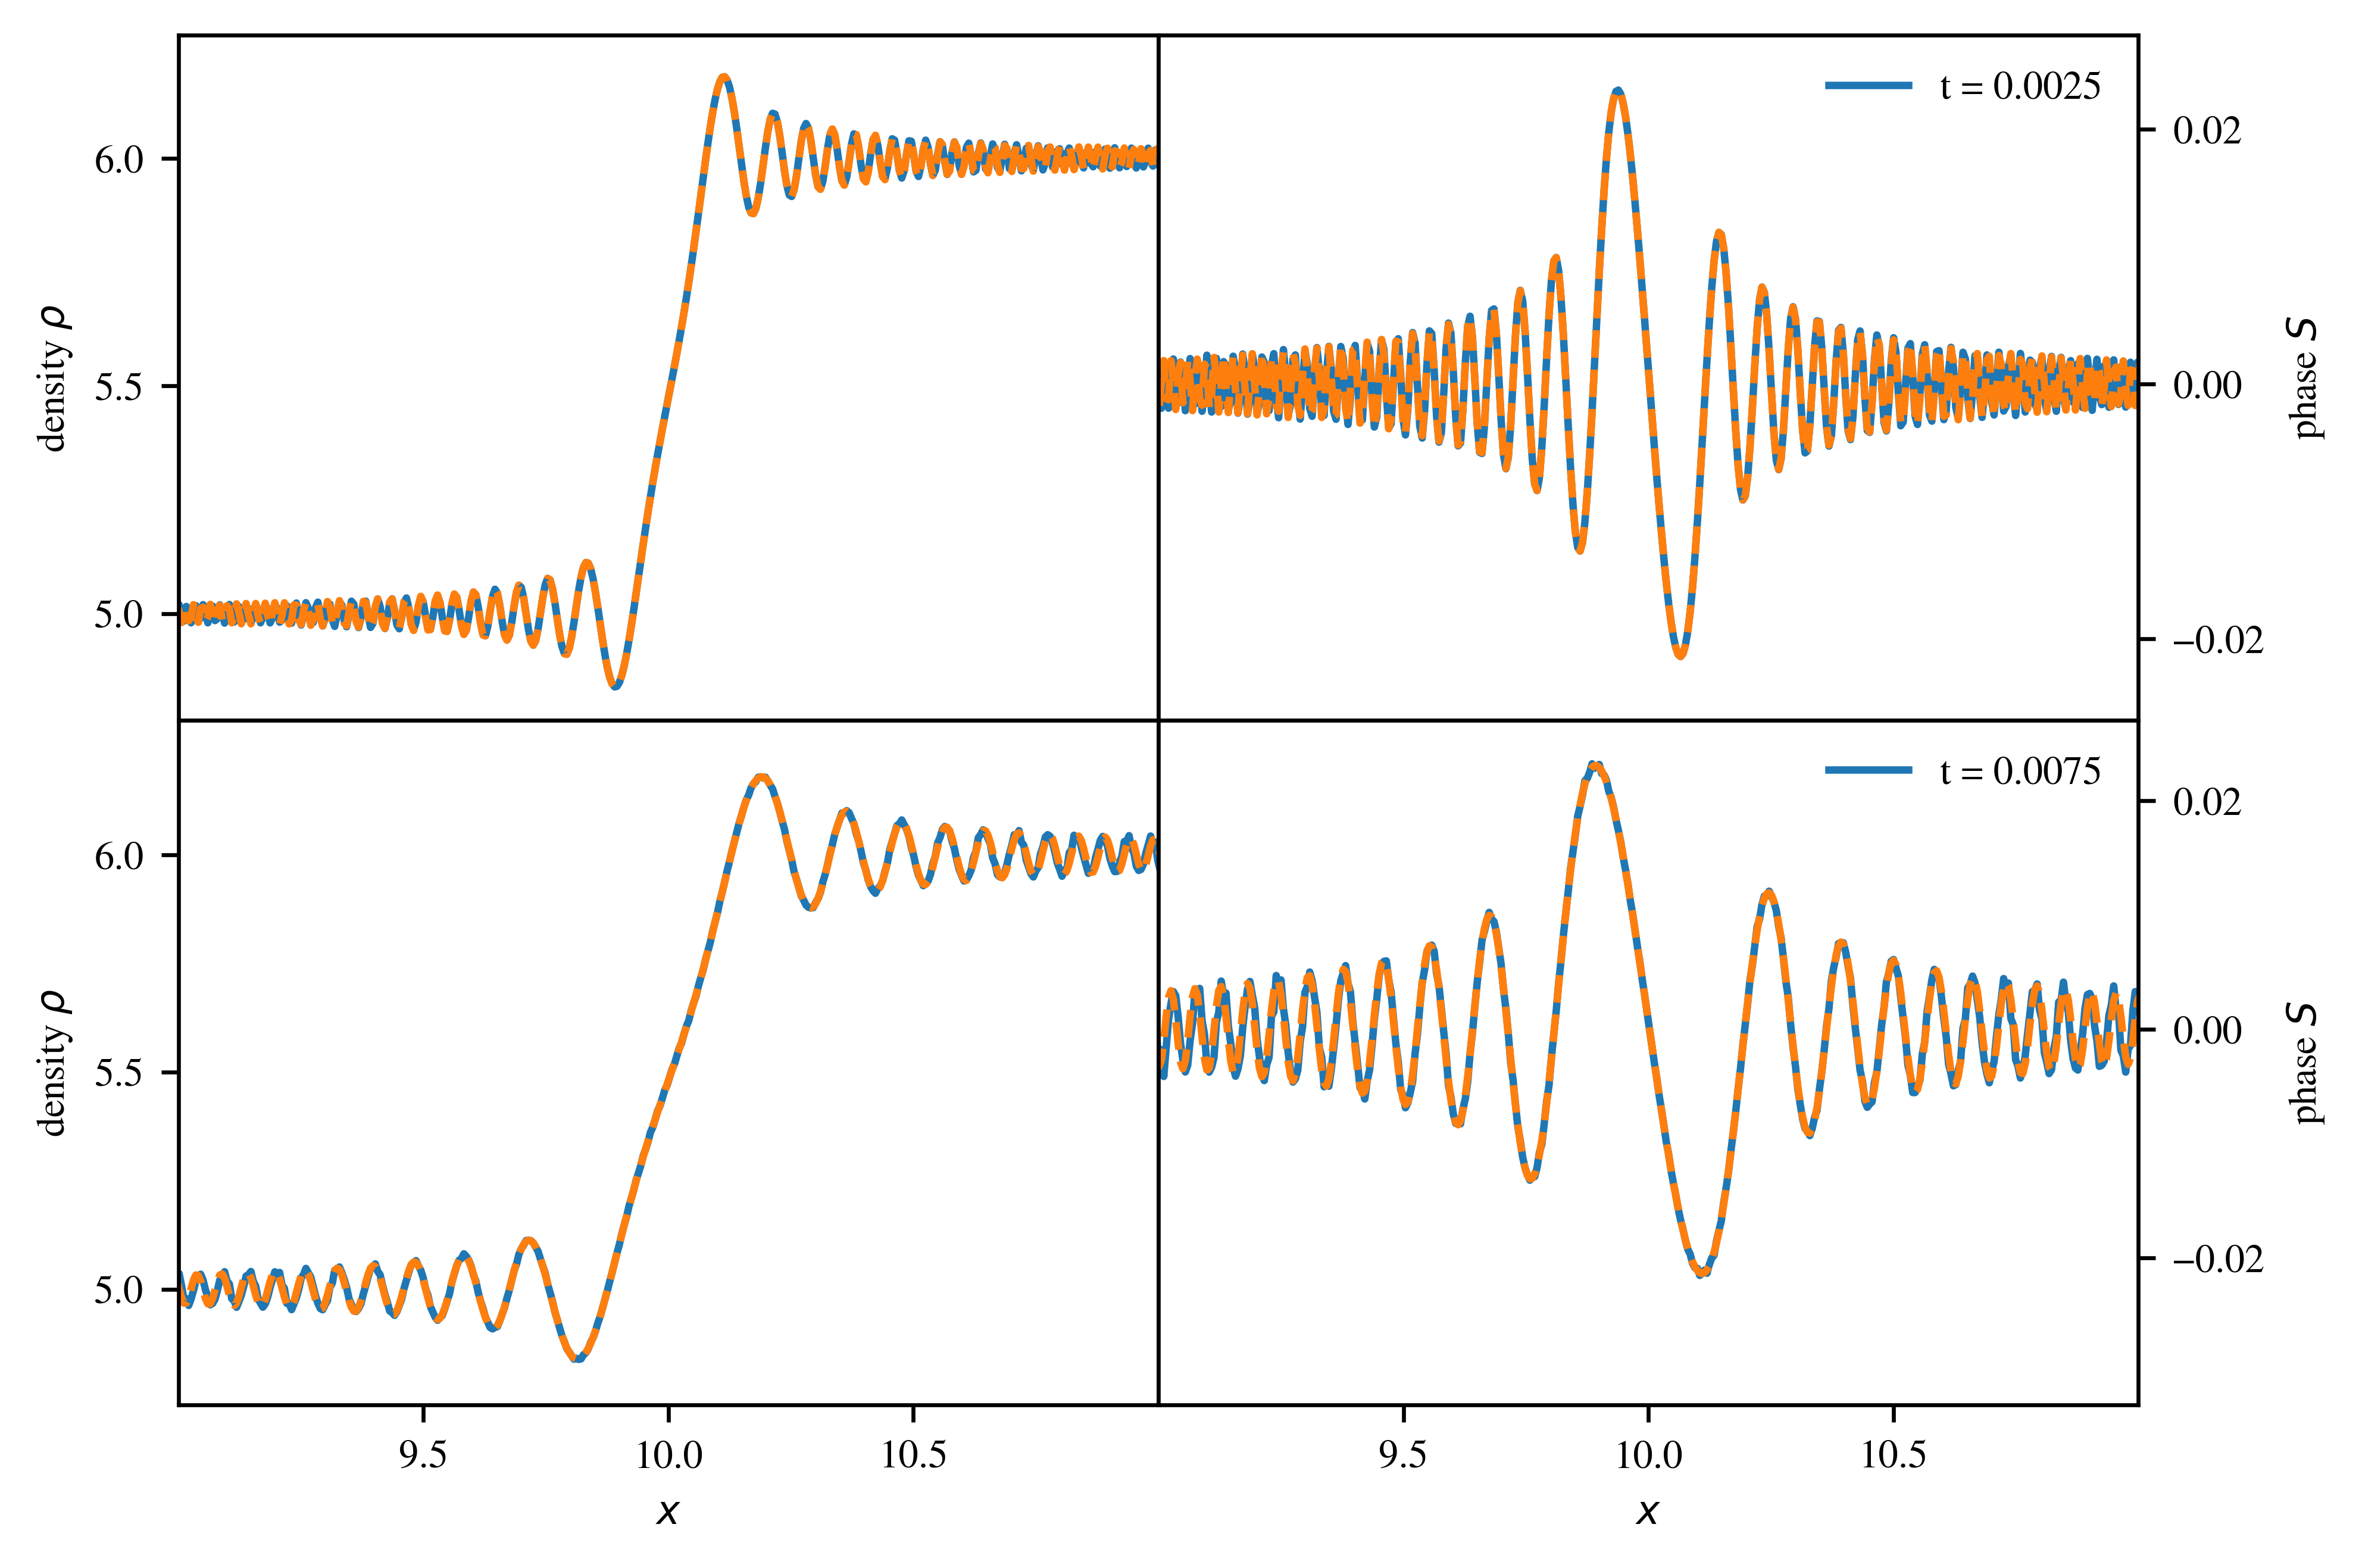

In [111]:
idx = 250
fig, ax = setUpPlot(nrow=2, xlim = [9, 11], xticks=[9.5, 10, 10.5], densityTicks=[5, 5.5, 6], phaseTicks=[-0.02, 0, 0.02])

config0, psi0 , density0, phase0= animation.loadRun(f"runs/1d/quasi-shock_phase_-_ho-upwind/{0}.npz")
config1, psi1 , density1, phase1= animation.loadRun(f"runs/1d/quasi-shock_phase_-_ho-upwind/{25}.npz")
config2, psi2 , density2, phase2= animation.loadRun(f"runs/1d/quasi-shock_phase_-_ho-upwind/{49}.npz")
t1 = 0.0025
t2 = config1["t0"]
t3 = config2["t0"]
xx = np.linspace(0, config1["domainSize"], config1["resolution"])
dx = config1["domainSize"]/config1["resolution"]
print(config1["t0"], config1["tEnd"], config1["domainSize"])


plt.sca(ax[0, 0])
#plt.xlim(0.05, .55)
plt.plot(xx, density0)
plt.plot(xx, (np.abs(psi0)**2), ls = "dashed")

plt.sca(ax[1, 0])
plt.plot(xx, density2)
plt.plot(xx, (np.abs(psi2)**2), ls = "dashed")

plt.sca(ax[0, 1])
plt.plot(xx, phase0, label=f"t = {t1:.4f}")
plt.plot(xx, fd.make_continuous(np.angle(psi0)), ls = "dashed")
leg = plt.legend(loc="upper right")
leg.get_frame().set_linewidth(0.0)

plt.sca(ax[1, 1])
plt.plot(xx, phase2, label=f"t = {t3:.4f}")
plt.plot(xx, fd.make_continuous(np.angle(psi2)), ls = "dashed")
leg = plt.legend(loc="upper right")
leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/quasi-shock.pdf", bbox_inches='tight')

## Wave packet collision

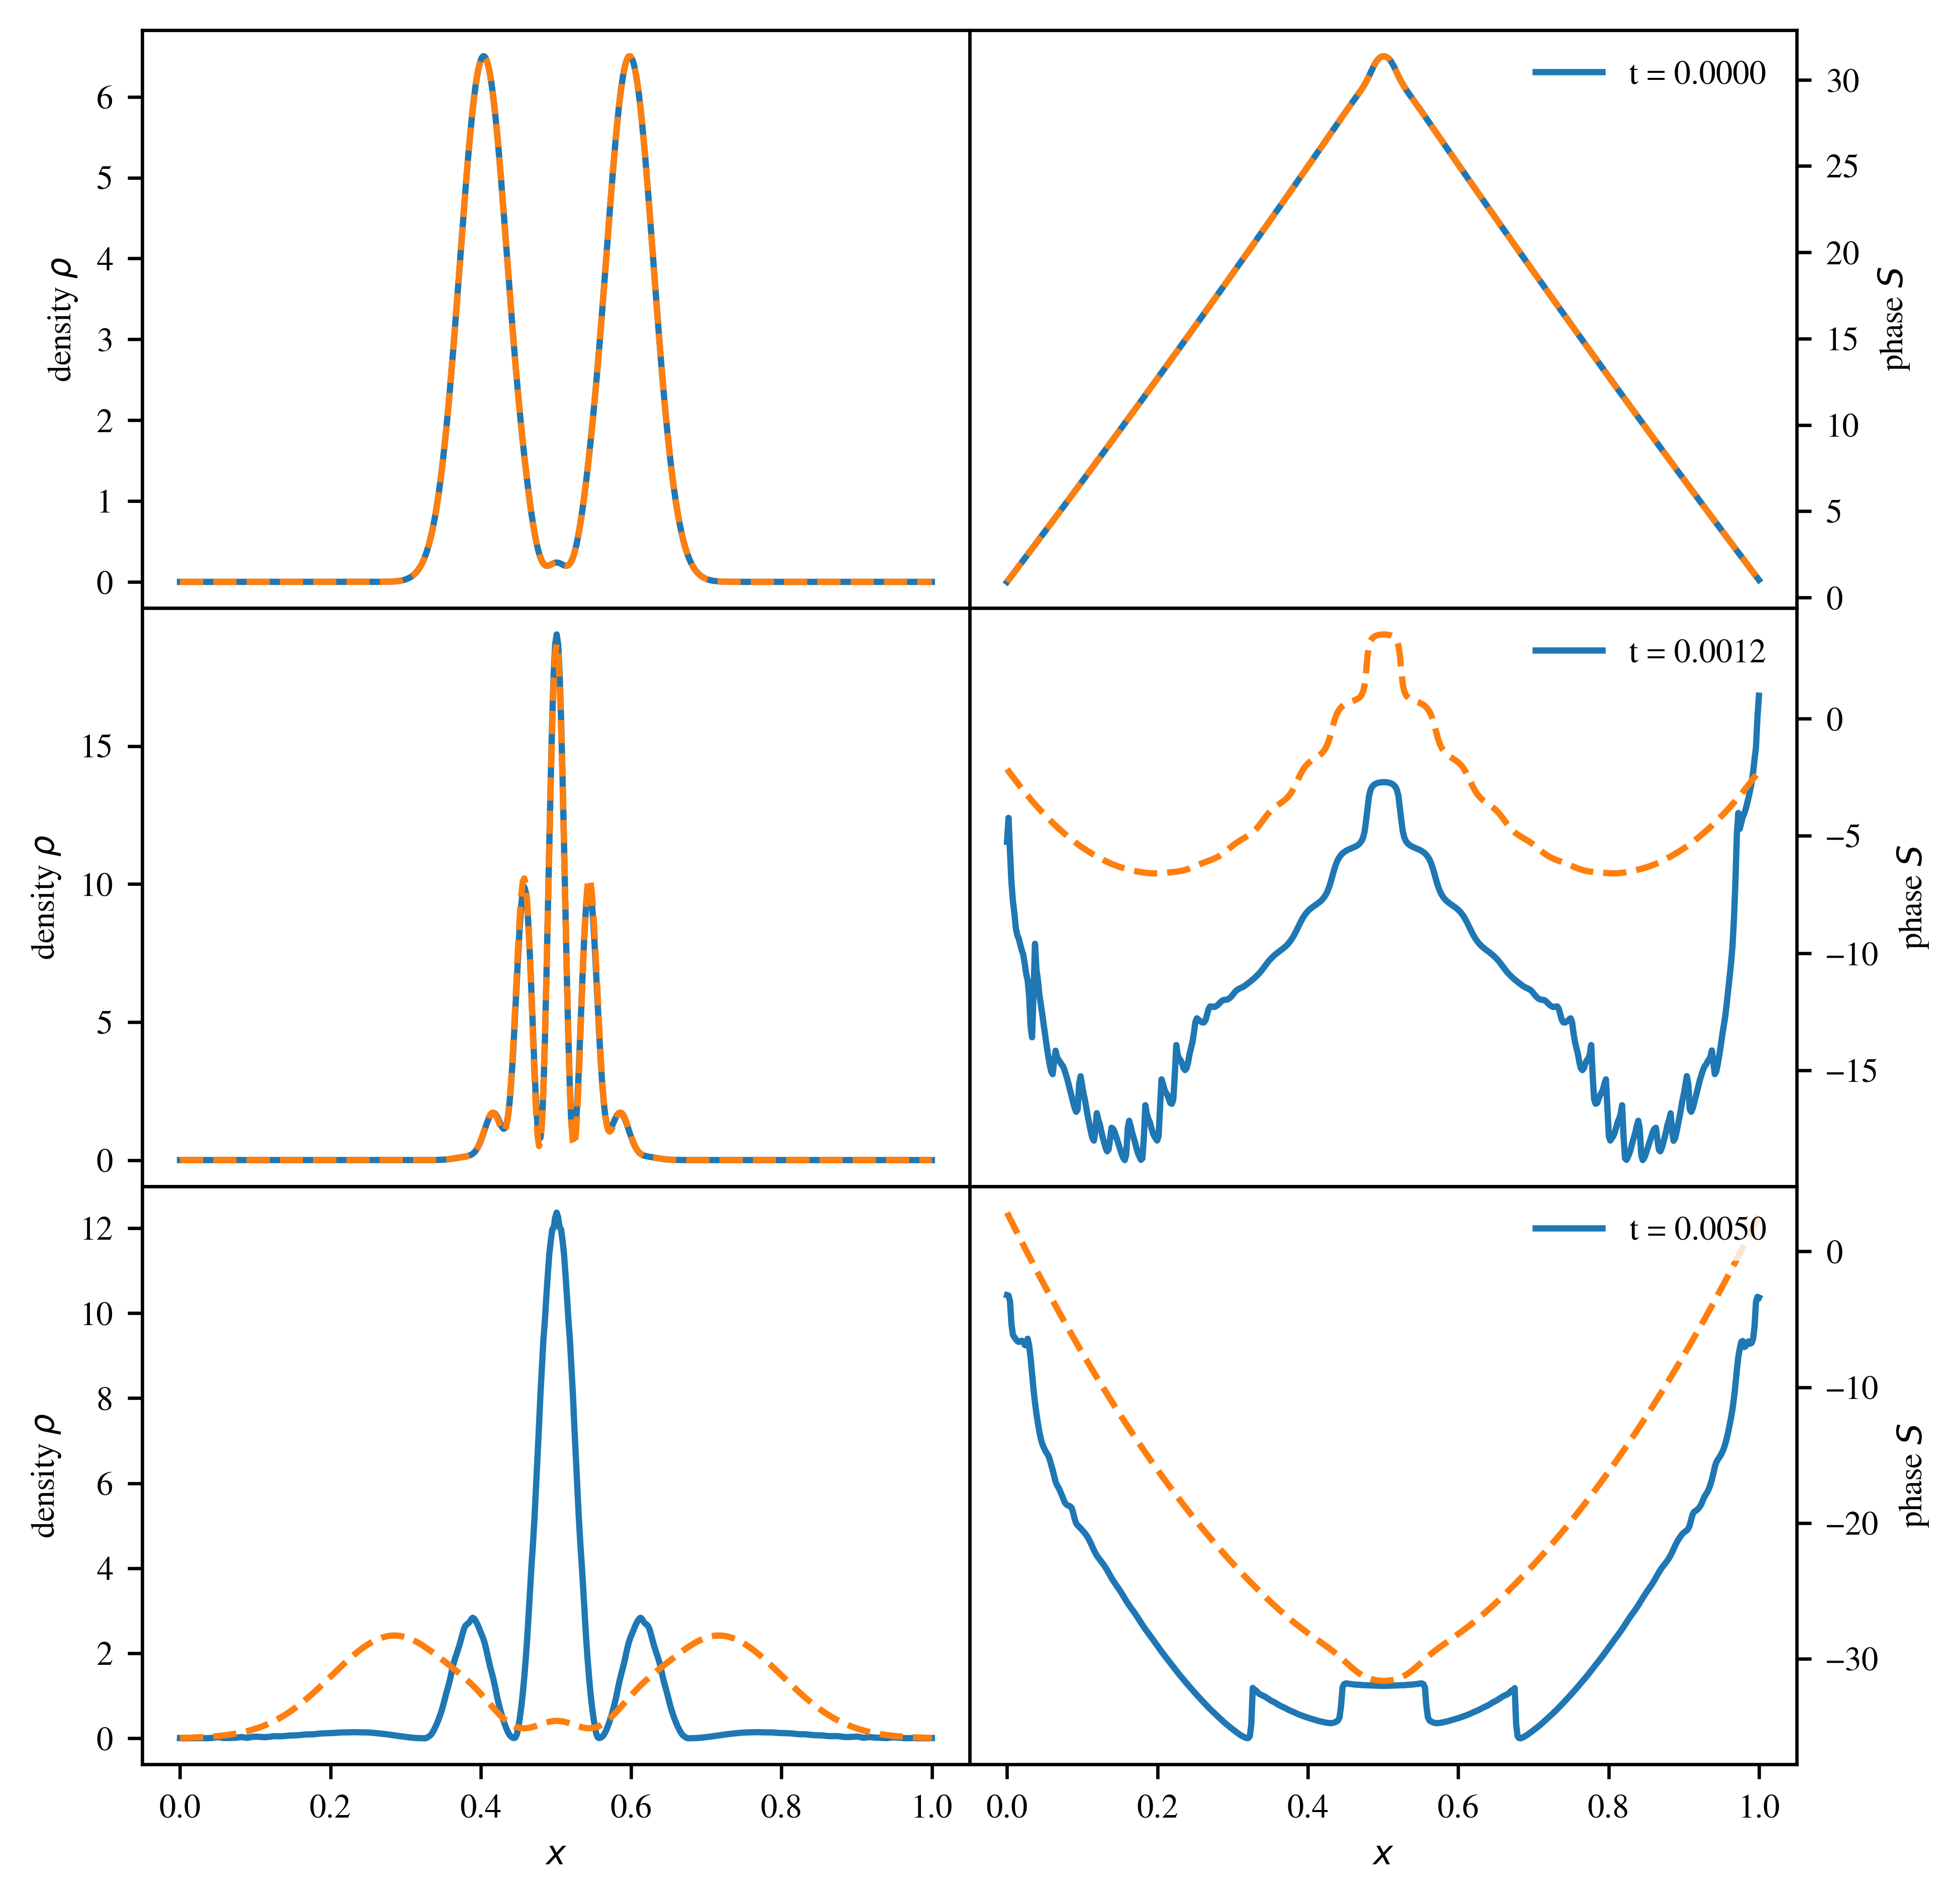

In [118]:
fig, ax = setUpPlot(nrow=3)

indices = [1, 49, 199]
for i, index in enumerate(indices):
    config, psi, density, phase = animation.loadRun(f"runs/1d/wave_packet_collision_phase-ho-upwind/{index}.npz")

    t = config["t0"]
    xx = np.linspace(0, config["domainSize"], config["resolution"])
    dx = config["domainSize"]/config["resolution"]


    plt.sca(ax[i, 0])
    #plt.xlim(0.05, .55)
    plt.plot(xx, density[8:-8])
    plt.plot(xx, (np.abs(psi[8:-8])**2), ls = "dashed")

    plt.sca(ax[i, 1])
    plt.plot(xx, phase[8:-8], label=f"t = {t:.4f}")
    plt.plot(xx, fd.make_continuous(np.angle(psi[8:-8])), ls = "dashed")
    leg = plt.legend(loc="upper right")
    leg.get_frame().set_linewidth(0.0)

leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/gaussian_collision.pdf", bbox_inches='tight')

## Hubble expansion

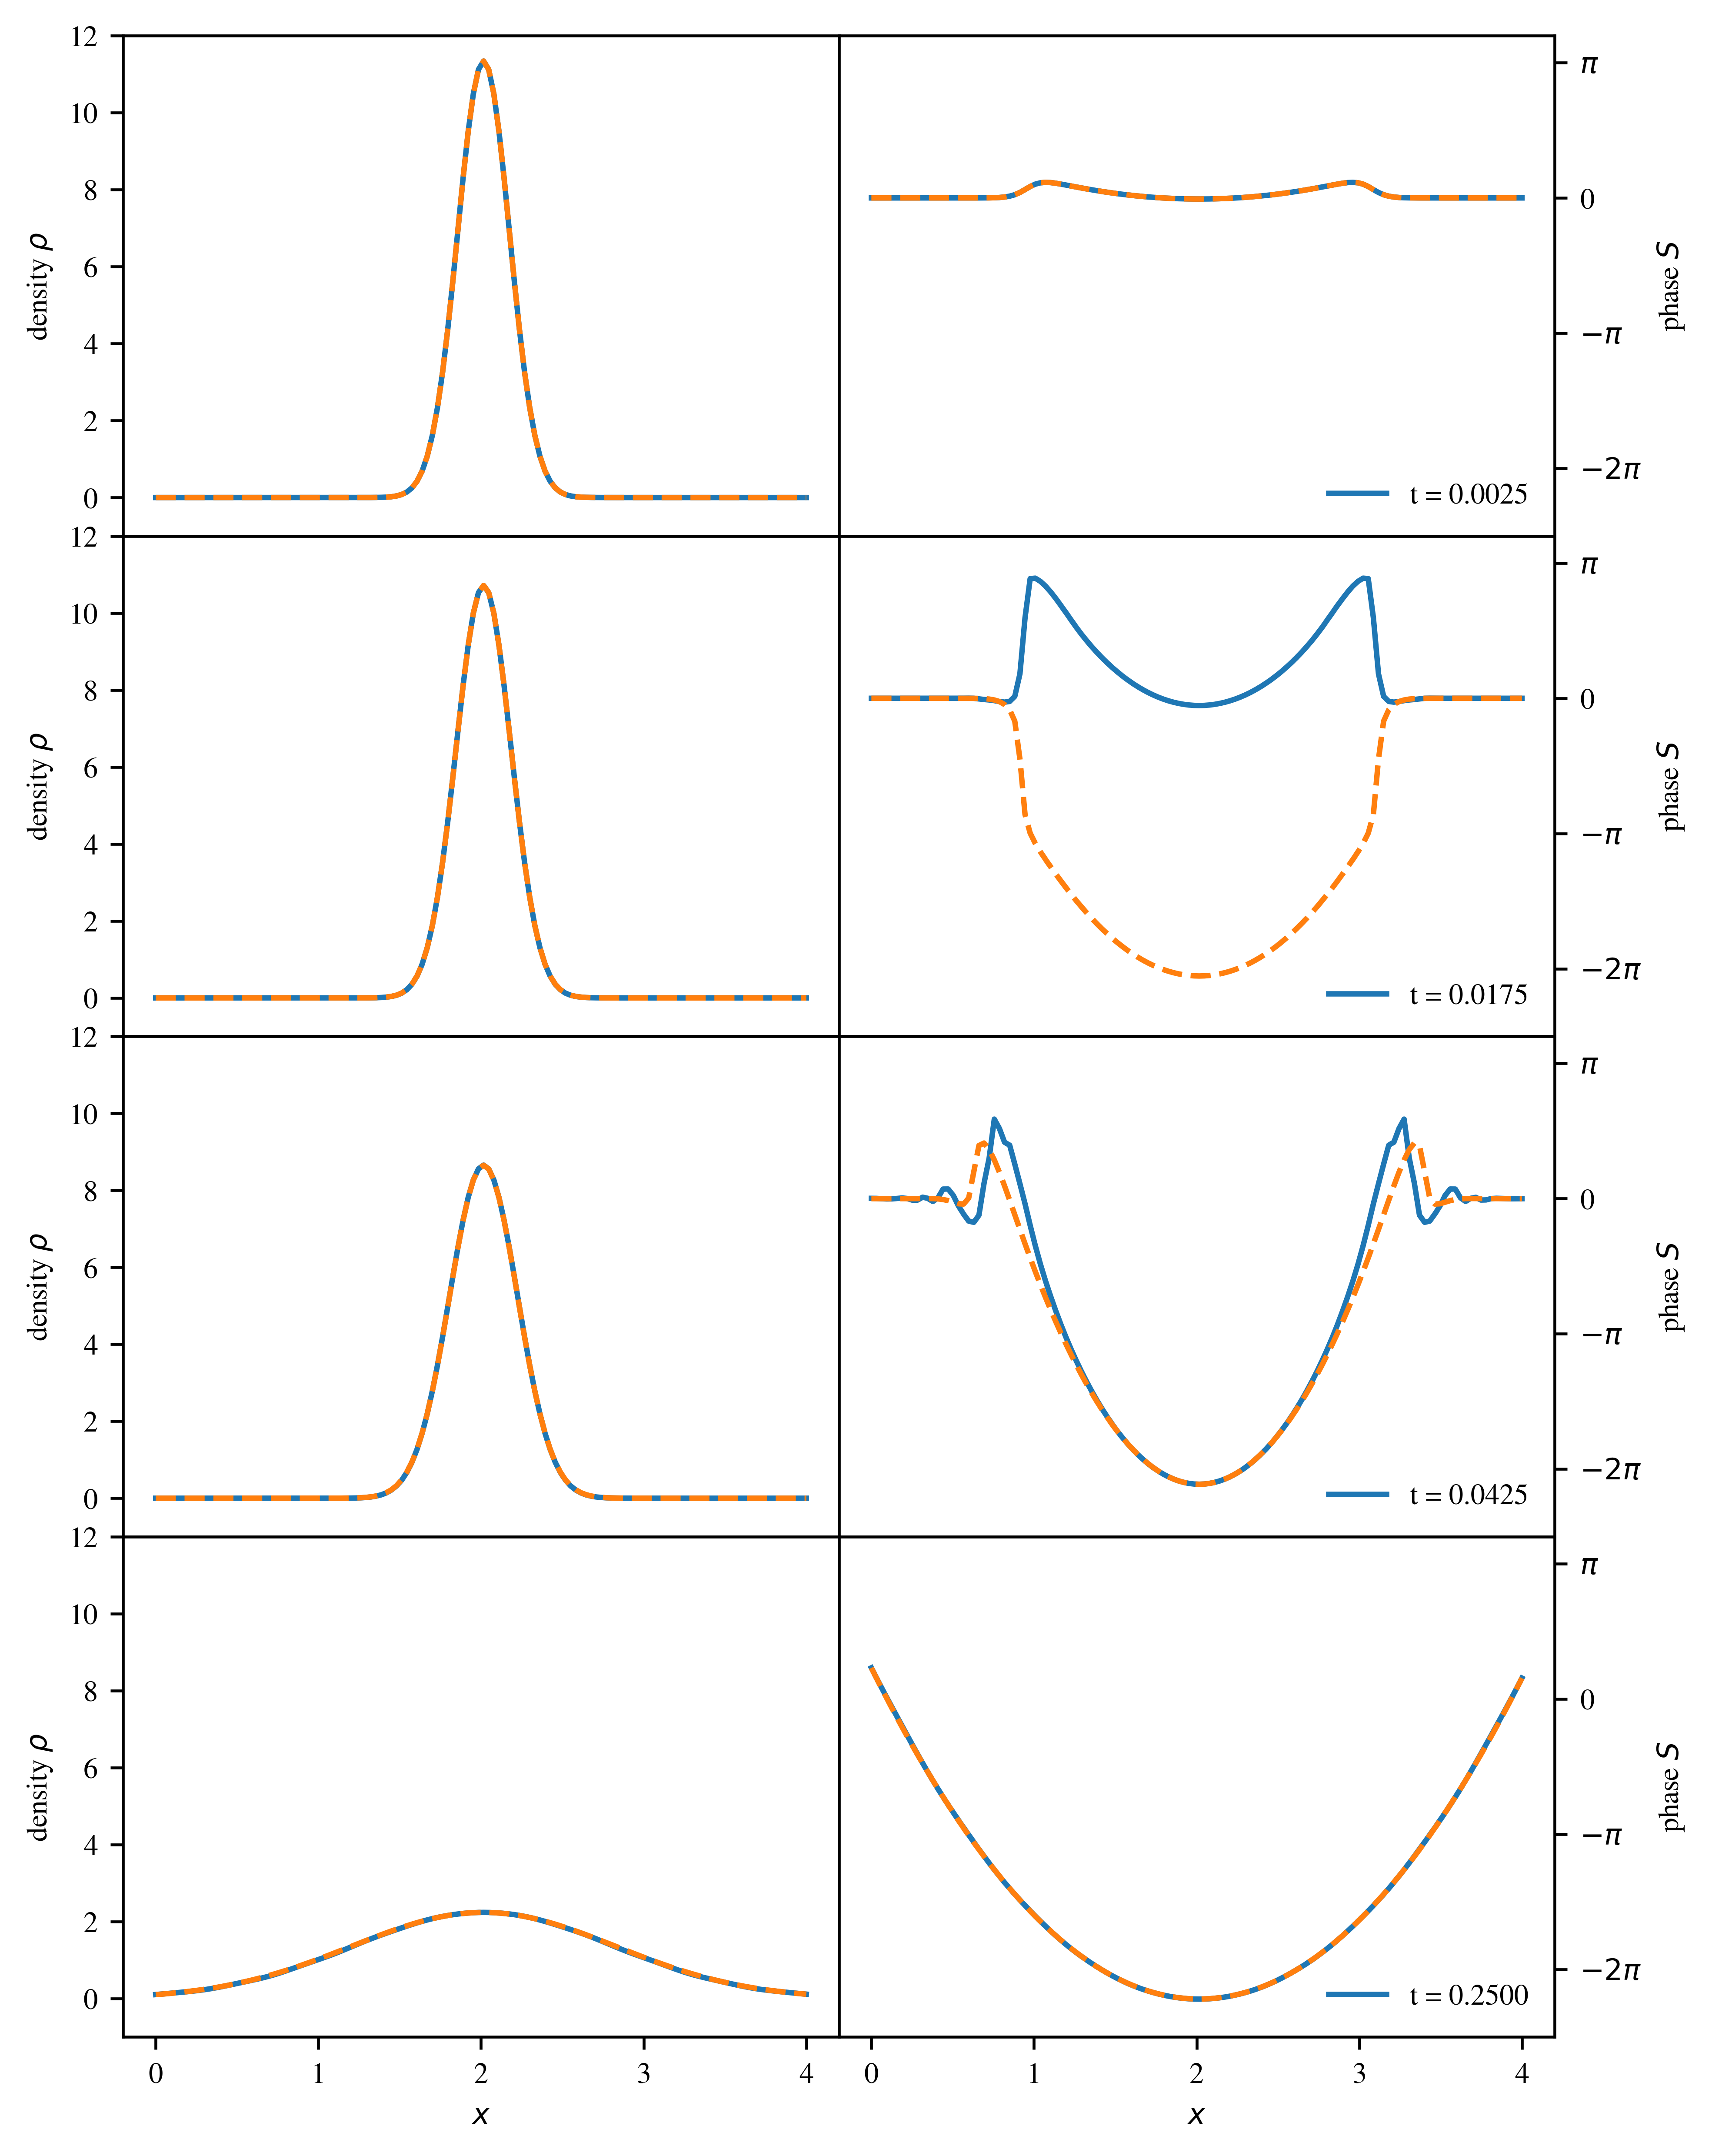

In [135]:
fig, ax = setUpPlot(nrow=4)

indices = [0, 6, 16, 99]
for i, index in enumerate(indices):
    config, psi, density, phase = animation.loadRun(f"runs/1d/hubble_expansion_phase-ho-upwind/{index}.npz")

    t = config["t0"]
    xx = np.linspace(0, config["domainSize"], config["resolution"])
    dx = config["domainSize"]/config["resolution"]


    plt.sca(ax[i, 0])
    #plt.xlim(0.05, .55)
    plt.plot(xx, density[8:-8])
    plt.plot(xx, (np.abs(psi[8:-8])**2), ls = "dashed")
    plt.ylim([-1, 12])

    plt.sca(ax[i, 1])
    plt.plot(xx, phase[8:-8], label=f"t = {t:.4f}")
    plt.plot(xx, fd.make_continuous(np.angle(psi[8:-8])), ls = "dashed")
    plt.ylim([-2.5*np.pi, 1.2*np.pi])
    plt.yticks([-2*np.pi, -np.pi, 0, np.pi], ["$-2\pi$", "$-\pi$", "0", "$\pi$"])
    leg = plt.legend(loc="lower right")
    leg.get_frame().set_linewidth(0.0)

leg.get_frame().set_linewidth(0.0)
plt.savefig("figures/hubble_expansion.pdf", bbox_inches='tight')

## Stability test